In [1]:

import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.preprocessing as preprocessing

from network_classes import MNIST_net
from torch_nn_functions import *


plt.rcParams.update({'font.size': 15,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'axes.linewidth':1.2,
                     'xtick.major.size': 6,
                     'xtick.major.width': 1.2,
                     'ytick.major.size': 6,
                     'ytick.major.width': 1.2,
                     'legend.frameon': False,
                     'legend.handletextpad': 0.1,
                     'figure.figsize': [14.0, 4.0],})

In [2]:
tensor_normalize = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.1307],std=[0.3081])])

MNIST_train = torchvision.datasets.MNIST(root='MNIST_data/',train=True,transform=tensor_normalize,download=False)
MNIST_test = torchvision.datasets.MNIST(root='MNIST_data/',train=False,transform=tensor_normalize,download=False)

batch_size = 32
dataloader = torch.utils.data.DataLoader(MNIST_train,
                                         batch_size=batch_size,
                                         shuffle=True)

dataloader_test = torch.utils.data.DataLoader(MNIST_test,
                                              batch_size=10000,
                                              shuffle=True)

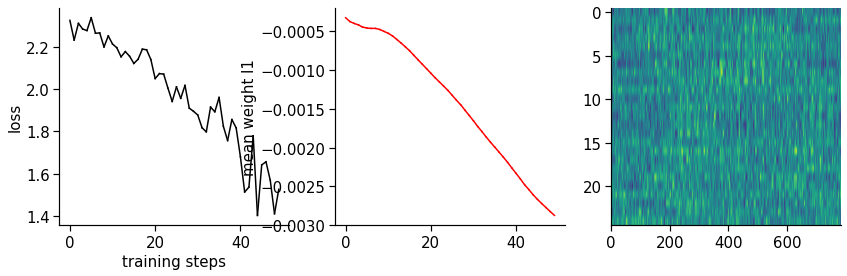

Final accuracy = 60.4900016784668%


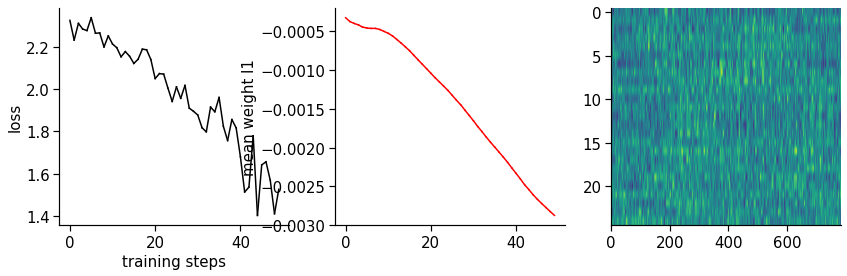

In [3]:
torch.manual_seed(102)
max_batch = 50

model = MNIST_net(batch_size)
model.train(dataloader,
            dataloader_test,
            num_epochs = 1,
            max_batch = max_batch,
            lr = 0.0005,
            plot_dynamic_loss=True)

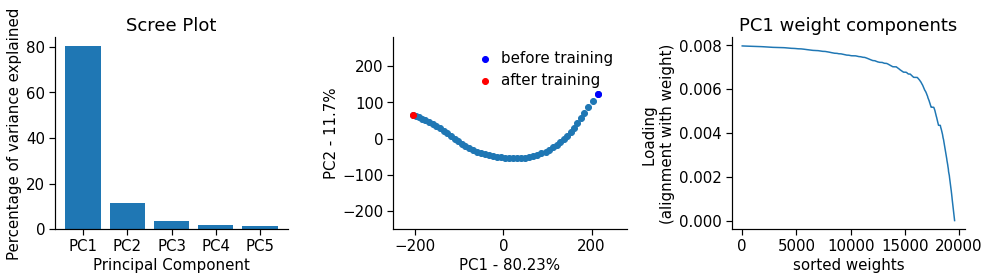

In [4]:
# PCA of the weight space

weight_h = model.weight_history1
plot_w_PCs(weight_h)


100%|█████████████████████████████████████████| 100/100 [01:24<00:00,  1.18it/s]


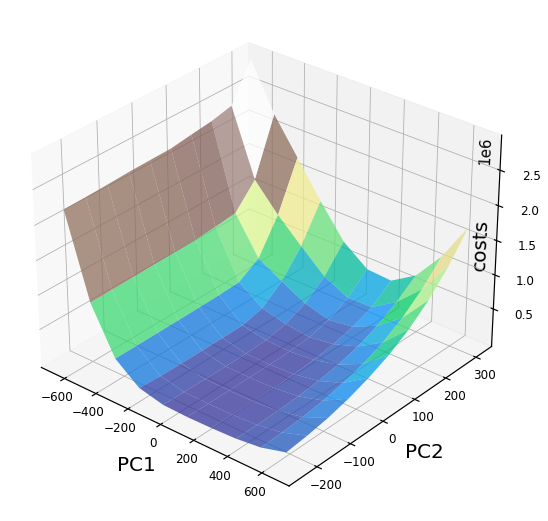

In [5]:
grid = get_grid(model, dataloader_test)

In [6]:
w1_h = model.weight_history1.flatten(start_dim=1)
w2_h = model.weight_history2.flatten(start_dim=1)
w3_h = model.weight_history3.flatten(start_dim=1)
w = torch.cat((w1_h, w2_h, w3_h), dim=1)

In [7]:
w.shape

torch.Size([50, 21350])